In [446]:
import pandas as pd

df = pd.read_csv('subjects.csv')
# Clean up data, column named 'Unnamed: 0' doesn't make sense
df = df.rename(columns={'Unnamed: 0': 'id'})
df.head(10)

,id,prior_heart_issues,status,gender,undergoing_treatment,age
0,0,True,NE,M,True,58
1,1,True,Declined,F,False,72
2,2,False,NE,M,False,19
3,3,True,Declined,M,True,41
4,4,False,Declined,M,True,29
5,5,False,Declined,F,False,36
6,6,True,NE,M,True,57
7,7,True,Declined,M,True,53
8,8,False,NE,F,False,42
9,9,False,NE,M,True,47


In [447]:
# Question 1
counted = df.groupby('status')['id'].count().reset_index(name="count")

In [448]:
import numpy as np
data = pd.DataFrame({"declined" : [np.nan, int(counted[(counted.status == 'Declined')]['count'])],
                    "Healed" : [int(counted[(counted.status == 'Healed')]['count']), np.nan],
                     "NE" : [int(counted[(counted.status == 'NE')]['count']), np.nan]},
                     index=['accepted', 'declined'])

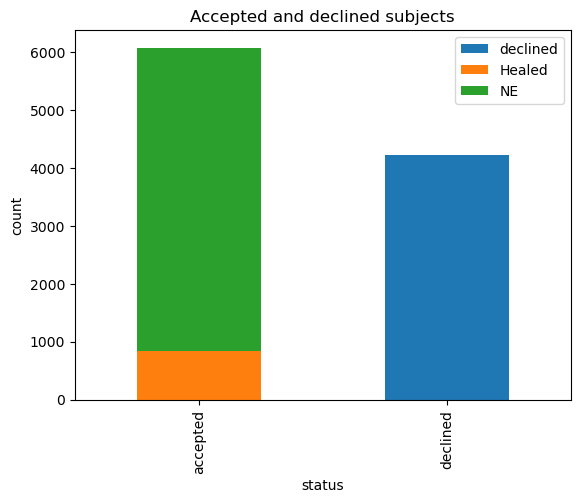

In [449]:
import matplotlib.pyplot as plt

data.plot(kind='bar', stacked=True)
plt.title("Accepted and declined subjects")
plt.xlabel("status")
plt.ylabel("count")

plt.show()

In [450]:
# Question 2
df['prior_heart_issues'] = df['prior_heart_issues'].replace({True: 1, False: 0})
df['undergoing_treatment'] = df['undergoing_treatment'].replace({True: 1, False: 0})
df['gender'] = df['gender'].replace({'M': 1, 'F': 0})

array([[<AxesSubplot:title={'center':'prior_heart_issues'}>,
        <AxesSubplot:title={'center':'gender'}>],
       [<AxesSubplot:title={'center':'undergoing_treatment'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

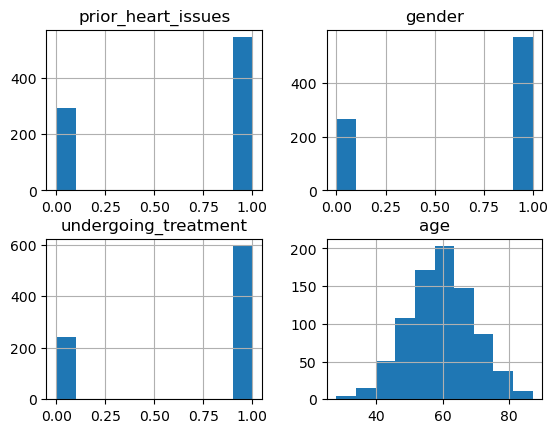

In [434]:
df_healed = df[(df.status !="Declined") & (df.status !="NE")].drop('id', axis=1)

df_healed.hist()

array([[<AxesSubplot:title={'center':'prior_heart_issues'}>,
        <AxesSubplot:title={'center':'gender'}>],
       [<AxesSubplot:title={'center':'undergoing_treatment'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

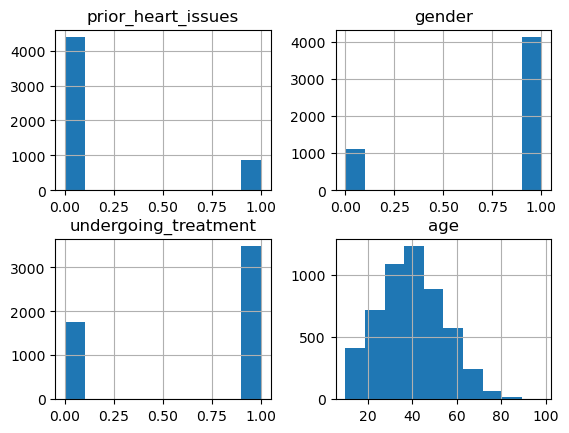

In [435]:
df_ne = df[(df.status !="Declined") & (df.status !="Healed")].drop('id', axis=1)
df_ne.hist()

In [451]:
# Question 3
declined_to_test = df[(df.status == 'Declined') & (df.prior_heart_issues)].drop('id', axis=1)

In [452]:
BEST_AGE = 60
declined_to_test["age_diff"] = (declined_to_test['age']-BEST_AGE).abs()

In [453]:
declined_to_test.sort_values(by="age_diff").head(100)

,prior_heart_issues,status,gender,undergoing_treatment,age,age_diff
10215,1,Declined,1,0,60,0
5489,1,Declined,1,1,60,0
2024,1,Declined,1,1,60,0
1086,1,Declined,1,0,60,0
4001,1,Declined,1,1,60,0
...,...,...,...,...,...,...
4717,1,Declined,1,0,59,1
4632,1,Declined,1,1,61,1
4968,1,Declined,1,1,59,1
4946,1,Declined,1,0,59,1
